# Continued from Part 1...

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# sets backend to render higher res images
%config InlineBackend.figure_formats = ['retina']

sns.set_style("white")

## Read Data

In [2]:
df = pd.read_csv('Breast Cancer Wisconsin (Diagnostic) Data Set-cleaned.csv')
df

,diagnosis,texture_mean,concavity_mean,compactness_se,concave points_se,area_worst,smoothness_worst,symmetry_worst
0,1,10.38,0.30010,0.04904,0.01587,2019.0,0.16220,0.4601
1,1,17.77,0.08690,0.01308,0.01340,1956.0,0.12380,0.2750
2,1,21.25,0.19740,0.04006,0.02058,1709.0,0.14440,0.3613
3,1,20.38,0.24140,0.07458,0.01867,567.7,0.20980,0.6638
4,1,14.34,0.19800,0.02461,0.01885,1575.0,0.13740,0.2364
...,...,...,...,...,...,...,...,...
564,1,22.39,0.24390,0.02891,0.02454,2027.0,0.14100,0.2060
565,1,28.25,0.14400,0.02423,0.01678,1731.0,0.11660,0.2572
566,1,28.08,0.09251,0.03731,0.01557,1124.0,0.11390,0.2218
567,1,29.33,0.35140,0.06158,0.01664,1821.0,0.16500,0.4087


**Information : [here](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29)**

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. 
* ID number 
* Diagnosis (M = malignant, B = benign)  

Ten real-valued features are computed for each cell nucleus:

a) radius (mean of distances from center to points on the perimeter)

b) texture (standard deviation of gray-scale values)

c) perimeter

d) area

e) smoothness (local variation in radius lengths)

f) compactness (perimeter^2 / area - 1.0)

g) concavity (severity of concave portions of the contour)

h) concave points (number of concave portions of the contour)

i) symmetry 

j) fractal dimension ("coastline approximation" - 1)

Several of the papers listed above contain detailed descriptions of
how these features are computed. 

The mean, standard error (SE), and "worst" or largest (mean of the three
largest values) of these features were computed for each image,
resulting in 30 features.  For instance, field 3 is Mean Radius, field
13 is Radius SE, field 23 is Worst Radius.

## Creating Model 
<br>
We can use sklearn library or we can write functions ourselves. Let's them both. Firstly we will write our functions after that we'll use sklearn library to calculate score.

In [3]:
# Reading the Data and Performing Basic Data Checks
print(df.shape)
df.describe()

(569, 8)


,diagnosis,texture_mean,concavity_mean,compactness_se,concave points_se,area_worst,smoothness_worst,symmetry_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,19.289649,0.088799,0.025478,0.011796,880.583128,0.132369,0.290076
std,0.483918,4.301036,0.079720,0.017908,0.006170,569.356993,0.022832,0.061867
min,0.000000,9.710000,0.000000,0.002252,0.000000,185.200000,0.071170,0.156500
25%,0.000000,16.170000,0.029560,0.013080,0.007638,515.300000,0.116600,0.250400
50%,0.000000,18.840000,0.061540,0.020450,0.010930,686.500000,0.131300,0.282200
75%,1.000000,21.800000,0.130700,0.032450,0.014710,1084.000000,0.146000,0.317900
max,1.000000,39.280000,0.426800,0.135400,0.052790,4254.000000,0.222600,0.663800


In [4]:
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, precision_recall_curve,f1_score
plt.style.use('ggplot')
%matplotlib inline
np.set_printoptions(suppress=True)

In [5]:
# Creating the Training and Test Datasets
target_column = ['diagnosis']
predictors = list(set(list(df.columns))-set(target_column))

X = df[predictors].values
y = df[target_column].values
y = np.ravel(y,order = 'C')

# Scaling by normalizing
df[predictors] = df[predictors]/df[predictors].max() 
df.describe()

,diagnosis,texture_mean,concavity_mean,compactness_se,concave points_se,area_worst,smoothness_worst,symmetry_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,0.491081,0.208058,0.188169,0.223454,0.207001,0.594648,0.436992
std,0.483918,0.109497,0.186785,0.132261,0.116884,0.133840,0.102572,0.093202
min,0.000000,0.247200,0.000000,0.016632,0.000000,0.043535,0.319721,0.235764
25%,0.000000,0.411660,0.069260,0.096603,0.144686,0.121133,0.523810,0.377222
50%,0.000000,0.479633,0.144189,0.151034,0.207047,0.161378,0.589847,0.425128
75%,1.000000,0.554990,0.306232,0.239660,0.278651,0.254819,0.655885,0.478909
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


We will split our data. 80% of our data will be train data and 20% of it will be test data.

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=9)
print(X_train.shape); print(X_test.shape)
print(y_train.shape); print(y_test.shape)

(455, 7)
(114, 7)
(455,)
(114,)


## Support Vector Machine (SVM) Algorithm 

In [7]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.svm import SVC
from sklearn import svm

#SVM
param_grid = {'C': [0.1,1, 10], 
              'gamma': [1,0.1,0.01]}
#               'kernel': ['rbf', 'poly', 'sigmoid']}
clf = GridSearchCV(SVC(probability=True, random_state=9),param_grid,verbose=2, cv=5, n_jobs = -1)
best_clf_svm = clf.fit(X_train,y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   14.8s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:   16.1s finished


In [8]:
best_clf_svm.best_params_

{'C': 1, 'gamma': 0.01}

In [9]:
print("The score for SVM Algorithm is")
print("Training: {:6.2f}%".format(100*best_clf_svm.best_score_))

The score for SVM Algorithm is
Training:  90.99%


In [10]:
accuracies = {}

acc = best_clf_svm.score(X_test,y_test)*100
accuracies['SVM'] = acc
print("Test Accuracy of SVM Algorithm: {:.2f}%".format(acc))

Test Accuracy of SVM Algorithm: 89.47%


In [11]:
#AUC
from sklearn.metrics import roc_auc_score, roc_curve
ROC_AUC_score = {}
auc = roc_auc_score(y_test, best_clf_svm.predict_proba(X_test)[:,1])
ROC_AUC_score['SVM'] = auc
print("ROC AUC score = {:.3f}".format(roc_auc_score(y_test, best_clf_svm.predict_proba(X_test)[:,1])))

ROC AUC score = 0.895


In [12]:
#Log loss
from sklearn.metrics import log_loss
Log_loss ={}
ll=log_loss(y_test, best_clf_svm.predict_proba(X_test))
Log_loss['SVM'] =ll
print("Log-loss: {:.3f}".format(log_loss(y_test, best_clf_svm.predict_proba(X_test))))

Log-loss: 0.320


In [13]:
#F1 score
F1_score = {}
svm_f1_score = f1_score(y_test,best_clf_svm.predict(X_test))
F1_score['SVM'] =svm_f1_score
print("F1 score: {:.3f}".format(f1_score(y_test,best_clf_svm.predict(X_test))))

F1 score: 0.838


## Sklearn Logistic Regression

In [14]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

penalty = ['l1', 'l2']
C = np.logspace(0, 4, 10)
hyperparameters = dict(C=C, penalty=penalty)

logit = LogisticRegression(max_iter=100000, random_state=9)
clf = GridSearchCV(logit, hyperparameters,cv=5, n_jobs = -1, verbose = 2)
best_clf_logit = clf.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    4.4s finished


In [15]:
best_clf_logit.best_params_

{'C': 3593.813663804626, 'penalty': 'l2'}

In [16]:
print("The score for Logistics Regression is")
print("Training: {:6.2f}%".format(100*best_clf_logit.best_score_))

The score for Logistics Regression is
Training:  98.02%


In [17]:
acc = best_clf_logit.score(X_test,y_test)*100
accuracies['Logistic Regression'] = acc
print("Test Accuracy {:.2f}%".format(acc))

Test Accuracy 97.37%


In [18]:
#AUC
from sklearn.metrics import roc_auc_score, roc_curve
auc = roc_auc_score(y_test, best_clf_logit.predict_proba(X_test)[:,1])
ROC_AUC_score['Logistic Regression'] = auc
print("ROC AUC score = {:.3f}".format(roc_auc_score(y_test, best_clf_logit.predict_proba(X_test)[:,1])))

ROC AUC score = 0.989


In [19]:
#Log-loss
from sklearn.metrics import log_loss
ll=log_loss(y_test, best_clf_logit.predict_proba(X_test))
Log_loss['Logistic Regression'] =ll
print("Log-loss: {:.3f}".format(log_loss(y_test, best_clf_logit.predict_proba(X_test))))

Log-loss: 0.117


In [20]:
#F1 score 
logit_f1_score = f1_score(y_test,best_clf_logit.predict(X_test))
F1_score['Logistic Regression'] =logit_f1_score
print("F1 score: {:.3f}".format(f1_score(y_test,best_clf_logit.predict(X_test))))

F1 score: 0.961


## Naive Bayes Algorithm

In [21]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()

cross_val_score(gnb, X, y, cv=5, scoring='accuracy')

print("The score for GaussianNB is")
print("Training: {:6.2f}%".format(100*np.mean(cross_val_score(gnb, X, y, cv=5, scoring='accuracy'))))

The score for GaussianNB is
Training:  94.03%


In [22]:
gnb = GaussianNB()
gnb.fit(X, y)

acc = gnb.score(X_test,y_test)*100
accuracies['Naive Bayes'] = acc
print("Accuracy of Naive Bayes (Gaussian): {:.2f}%".format(acc))

Accuracy of Naive Bayes (Gaussian): 95.61%


In [23]:
#AUC
auc = roc_auc_score(y_test, gnb.predict_proba(X_test)[:,1])
ROC_AUC_score['Naive Bayes'] = auc
print("ROC AUC score = {:.2f}".format(roc_auc_score(y_test, gnb.predict_proba(X_test)[:,1])))

ROC AUC score = 0.99


In [24]:
#Log loss
ll=log_loss(y_test, gnb.predict_proba(X_test))
Log_loss['Naive Bayes'] =ll
print("Log-loss: {:.3f}".format(log_loss(y_test, gnb.predict_proba(X_test))))

Log-loss: 0.130


In [25]:
#F1 score
gnb_f1_score = f1_score(y_test,gnb.predict(X_test))
F1_score['Naive Bayes'] =gnb_f1_score
print("F1 score: {:.3f}".format(f1_score(y_test,gnb.predict(X_test))))

F1 score: 0.933


## Decision Tree Algorithm

In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

parameters = {'criterion' : ['gini','entropy'],
                'max_depth': [2,4,6,8,10,12,14,16,18,20],
                'min_samples_leaf': [1, 2, 4],
                'min_samples_split': [2, 5, 10]}

dtc = DecisionTreeClassifier(random_state=9)
clf = GridSearchCV(dtc, parameters,cv=5, n_jobs = -1, verbose = 2)
best_clf_dtc = clf.fit(X_train,y_train)

Fitting 5 folds for each of 180 candidates, totalling 900 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 408 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done 885 out of 900 | elapsed:    8.8s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 900 out of 900 | elapsed:    8.8s finished


In [27]:
best_clf_dtc.best_params_

{'criterion': 'entropy',
 'max_depth': 6,
 'min_samples_leaf': 1,
 'min_samples_split': 5}

In [28]:
print("The score for Decision Tree is")
print("Training: {:6.2f}%".format(100*best_clf_dtc.best_score_))

The score for Decision Tree is
Training:  94.29%


In [29]:
acc = best_clf_dtc.score(X_test, y_test)*100
accuracies['Decision Tree'] = acc
print("Decision Tree Test Accuracy {:.2f}%".format(acc))

Decision Tree Test Accuracy 95.61%


In [30]:
#AUC
auc = roc_auc_score(y_test, best_clf_dtc.predict_proba(X_test)[:,1])
ROC_AUC_score['Decision Tree'] = auc
print("ROC AUC score = {:.3f}".format(roc_auc_score(y_test, best_clf_dtc.predict_proba(X_test)[:,1])))

ROC AUC score = 0.967


In [31]:
#Log loss
ll=log_loss(y_test, best_clf_dtc.predict_proba(X_test))
Log_loss['Decision Tree'] =ll
print("Log-loss: {:.3f}".format(log_loss(y_test, best_clf_dtc.predict_proba(X_test))))

Log-loss: 0.927


In [32]:
#F1 score
dtc_f1_score = f1_score(y_test,best_clf_dtc.predict(X_test))
F1_score['Decision Tree'] =dtc_f1_score
print("F1 score: {:.3f}".format(f1_score(y_test,best_clf_dtc.predict(X_test))))

F1 score: 0.937


## Random Forest Classification

In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

parameters = {'criterion' : ['gini','entropy'],
               'n_estimators' : [100, 300, 500, 800, 1000],
                'max_depth' : [5, 8, 15, 25, 30],
                'min_samples_split' : [2, 5, 10, 15, 100],
                'min_samples_leaf' : [1, 2, 5, 10]}

rf = RandomForestClassifier(random_state=9)
clf = GridSearchCV(rf, parameters,cv=5, n_jobs = -1, verbose = 2)
best_clf_rf = clf.fit(X_train,y_train)

Fitting 5 folds for each of 1000 candidates, totalling 5000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   18.5s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  5.6min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  9.9min
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed: 15.2min
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed: 21.7min
[Parallel(n_jobs=-1)]: Done 1969 tasks      | elapsed: 25.7min
[Parallel(n_jobs=-1)]: Done 2576 tasks      | elapsed: 30.9min
[Parallel(n_jobs=-1)]: Done 3265 tasks      | elapsed: 37.3min
[Parallel(n_jobs=-1)]: Done 4034 tasks      | elapsed: 42.8min
[Parallel(n_jobs=-1)]: Done 4885 tasks      | elapsed: 49.6min
[Parallel(n_jobs=-1)]: Done 5000 out of 5000 | elapsed: 50.8min finished


In [34]:
best_clf_rf.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 500}

In [35]:
print("The score for Random Forest is")
print("Training: {:6.2f}%".format(100*best_clf_rf.best_score_))

The score for Random Forest is
Training:  97.14%


In [36]:
acc = best_clf_rf.score(X_test,y_test)*100
accuracies['Random Forest'] = acc
print("Random Forest Algorithm Accuracy Score : {:.2f}%".format(acc))

Random Forest Algorithm Accuracy Score : 98.25%


In [37]:
#AUC
auc = roc_auc_score(y_test, best_clf_rf.predict_proba(X_test)[:,1])
ROC_AUC_score['Random Forest'] = auc
print("ROC AUC score = {:.3f}".format(roc_auc_score(y_test, best_clf_rf.predict_proba(X_test)[:,1])))

ROC AUC score = 0.995


In [38]:
#Log loss
ll=log_loss(y_test, best_clf_rf.predict_proba(X_test))
Log_loss['Random Forest'] =ll
print("Log-loss: {:.3f}".format(log_loss(y_test, best_clf_rf.predict_proba(X_test))))

Log-loss: 0.108


In [39]:
#F1 score
rf_f1_score = f1_score(y_test,best_clf_rf.predict(X_test))
F1_score['Random Forest'] =rf_f1_score
print("F1 score: {:.3f}".format(f1_score(y_test,best_clf_rf.predict(X_test))))

F1 score: 0.974


## K-Nearest Neighbour (KNN) Classification

In [40]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

parameters = {'n_neighbors':list(np.arange(1,30,1))}
knn = KNeighborsClassifier()
clf = GridSearchCV(knn, parameters, cv=5, n_jobs = -1, verbose = 2)
best_clf_knn = clf.fit(X_train,y_train)

Fitting 5 folds for each of 29 candidates, totalling 145 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 145 out of 145 | elapsed:    0.8s finished


In [41]:
best_clf_knn.best_params_

{'n_neighbors': 21}

In [42]:
print("The score for K-Nearest Neighbour (KNN) is")
print("Training: {:6.2f}%".format(100*best_clf_knn.best_score_))

The score for K-Nearest Neighbour (KNN) is
Training:  91.87%


In [43]:
acc = best_clf_knn.score(X_test,y_test)*100
accuracies['KNN'] = acc
print("Test Accuracy {:.2f}%".format(acc))

Test Accuracy 90.35%


In [44]:
#AUC
auc = roc_auc_score(y_test, best_clf_knn.predict_proba(X_test)[:,1])
ROC_AUC_score['KNN'] = auc
print("ROC AUC score = {:.3f}".format(roc_auc_score(y_test, best_clf_knn.predict_proba(X_test)[:,1])))

ROC AUC score = 0.952


In [45]:
#Log loss
ll=log_loss(y_test, best_clf_knn.predict_proba(X_test))
Log_loss['KNN'] =ll
print("Log-loss: {:.3f}".format(log_loss(y_test, best_clf_knn.predict_proba(X_test))))

Log-loss: 0.490


In [46]:
# F1 score
knn_f1_score = f1_score(y_test,best_clf_knn.predict(X_test))
F1_score['KNN'] =knn_f1_score
print("F1 score: {:0.3f}".format(f1_score(y_test,best_clf_knn.predict(X_test))))

F1 score: 0.845


## XGBoost Algorithm

In [47]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

parameters = {
     "eta"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
     "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12],
     "min_child_weight" : [ 1, 3, 5, 7 ],
     "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4],
     "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ], 
     "reg_alpha": [0, 0.001, 0.005, 0.01, 0.05]
     }

xgb = xgb.XGBClassifier(objective = "binary:logistic", seed=9)
clf = GridSearchCV(xgb,parameters, n_jobs=4, scoring="neg_log_loss", cv=5, verbose = 2)
best_clf_xgb = clf.fit(X_train, y_train)

Fitting 5 folds for each of 16800 candidates, totalling 84000 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    7.1s
[Parallel(n_jobs=4)]: Done 236 tasks      | elapsed:   13.8s
[Parallel(n_jobs=4)]: Done 642 tasks      | elapsed:   25.3s
[Parallel(n_jobs=4)]: Done 1208 tasks      | elapsed:   39.8s
[Parallel(n_jobs=4)]: Done 1938 tasks      | elapsed:   57.6s
[Parallel(n_jobs=4)]: Done 2828 tasks      | elapsed:  1.3min
[Parallel(n_jobs=4)]: Done 3882 tasks      | elapsed:  1.7min
[Parallel(n_jobs=4)]: Done 5096 tasks      | elapsed:  2.2min
[Parallel(n_jobs=4)]: Done 6474 tasks      | elapsed:  2.8min
[Parallel(n_jobs=4)]: Done 8012 tasks      | elapsed:  3.3min
[Parallel(n_jobs=4)]: Done 9714 tasks      | elapsed:  4.0min
[Parallel(n_jobs=4)]: Done 11576 tasks      | elapsed:  4.7min
[Parallel(n_jobs=4)]: Done 13602 tasks      | elapsed:  5.5min
[Parallel(n_jobs=4)]: Done 15788 tasks      | elapsed:  6.3min
[Parallel(n_jobs=4)]: Done 18138 tasks      | elapsed:  7

In [48]:
best_clf_xgb.best_params_

{'colsample_bytree': 0.7,
 'eta': 0.05,
 'gamma': 0.4,
 'max_depth': 3,
 'min_child_weight': 1,
 'reg_alpha': 0.05}

In [49]:
y_pred=best_clf_xgb.predict(X_train)
y_pred=(y_pred > 0.5)
acc = accuracy_score(y_train, y_pred)*100
print("The score for XGBoost Classifier is")
print("Training: {:6.2f}%".format(acc))

The score for XGBoost Classifier is
Training:  99.78%


In [50]:
y_pred=best_clf_xgb.predict(X_test)
y_pred=(y_pred > 0.5)
acc = accuracy_score(y_test, y_pred)*100
accuracies['XGBoost'] = acc
print("Test Accuracy {:.2f}%".format(acc))

Test Accuracy 97.37%


In [51]:
#AUC
auc = roc_auc_score(y_test, best_clf_xgb.predict_proba(X_test)[:,1])
ROC_AUC_score['XGBoost'] = auc
print("ROC AUC score = {:.3f}".format(roc_auc_score(y_test, best_clf_xgb.predict_proba(X_test)[:,1])))

ROC AUC score = 0.997


In [52]:
#Log loss
ll=log_loss(y_test, best_clf_xgb.predict_proba(X_test))
Log_loss['XGBoost'] =ll
print("Log-loss: {:.3f}".format(log_loss(y_test, best_clf_xgb.predict_proba(X_test))))

Log-loss: 0.085


In [53]:
# F1 score
xgb_f1_score = f1_score(y_test,best_clf_xgb.predict(X_test))
F1_score['XGBoost'] =xgb_f1_score
print("F1 score: {:0.3f}".format(f1_score(y_test,best_clf_xgb.predict(X_test))))

F1 score: 0.962


## Comparing Models

In [54]:
accuracies

{'SVM': 89.47368421052632,
 'Logistic Regression': 97.36842105263158,
 'Naive Bayes': 95.6140350877193,
 'Decision Tree': 95.6140350877193,
 'Random Forest': 98.24561403508771,
 'KNN': 90.35087719298247,
 'XGBoost': 97.36842105263158}

In [55]:
ROC_AUC_score

{'SVM': 0.8945945945945947,
 'Logistic Regression': 0.9885135135135136,
 'Naive Bayes': 0.9891891891891892,
 'Decision Tree': 0.9673986486486488,
 'Random Forest': 0.9945945945945945,
 'KNN': 0.952027027027027,
 'XGBoost': 0.9969594594594595}

In [56]:
Log_loss

{'SVM': 0.3199086566087595,
 'Logistic Regression': 0.11651238806270396,
 'Naive Bayes': 0.13002574548663626,
 'Decision Tree': 0.9271558835650172,
 'Random Forest': 0.10777346409826047,
 'KNN': 0.4904920104097029,
 'XGBoost': 0.0854864147692927}

In [57]:
F1_score

{'SVM': 0.8378378378378379,
 'Logistic Regression': 0.961038961038961,
 'Naive Bayes': 0.9333333333333333,
 'Decision Tree': 0.9367088607594937,
 'Random Forest': 0.9743589743589743,
 'KNN': 0.8450704225352113,
 'XGBoost': 0.9620253164556962}

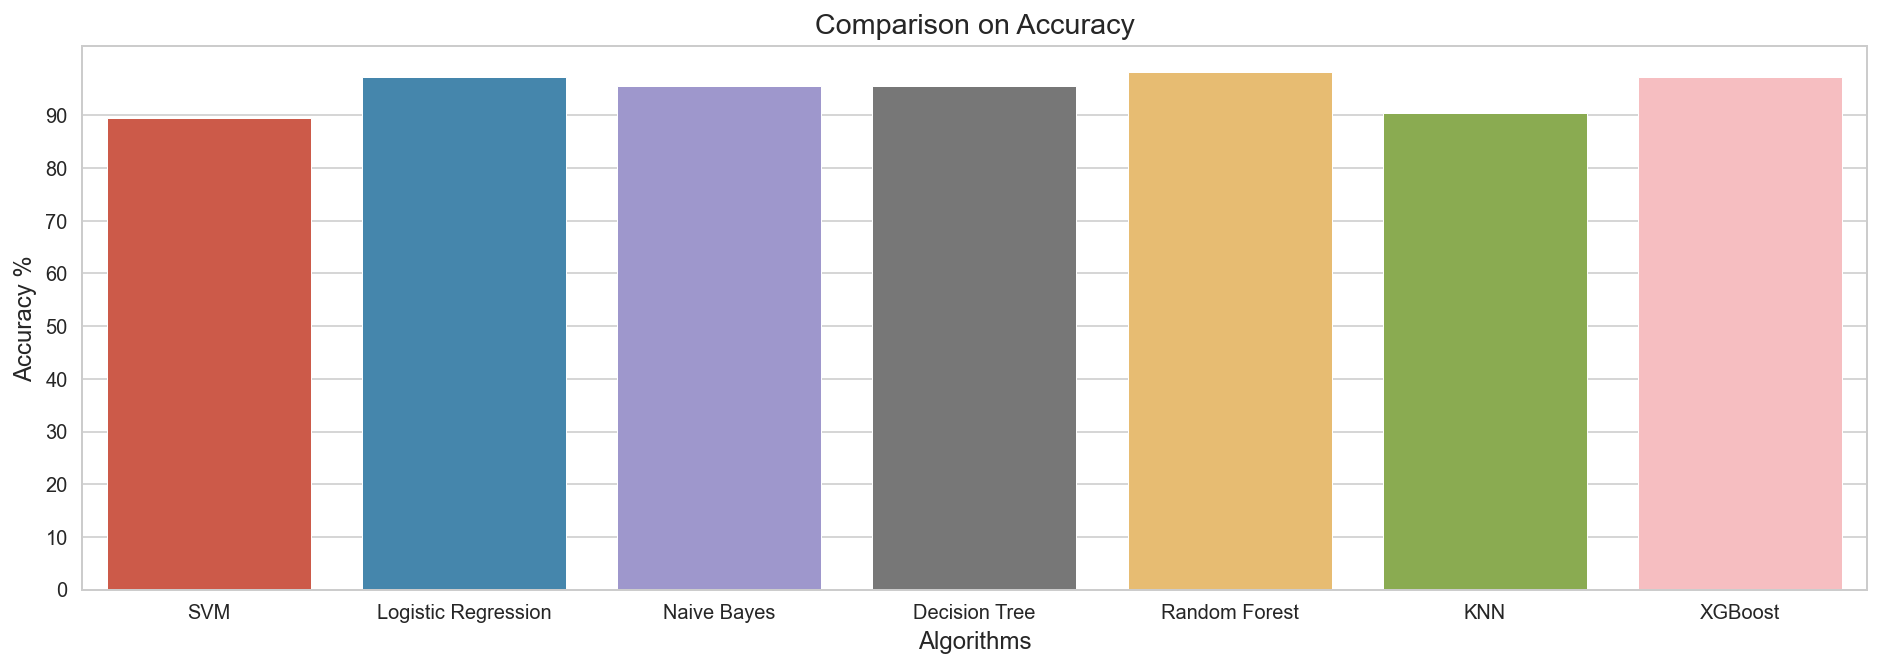

In [58]:
# colors = ["purple", "green", "orange", "magenta","#CFC60E","#0FBBAE"]

sns.set_style("whitegrid")
plt.figure(figsize=(16,5))
plt.yticks(np.arange(0,100,10))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()))
plt.title('Comparison on Accuracy')
plt.show()

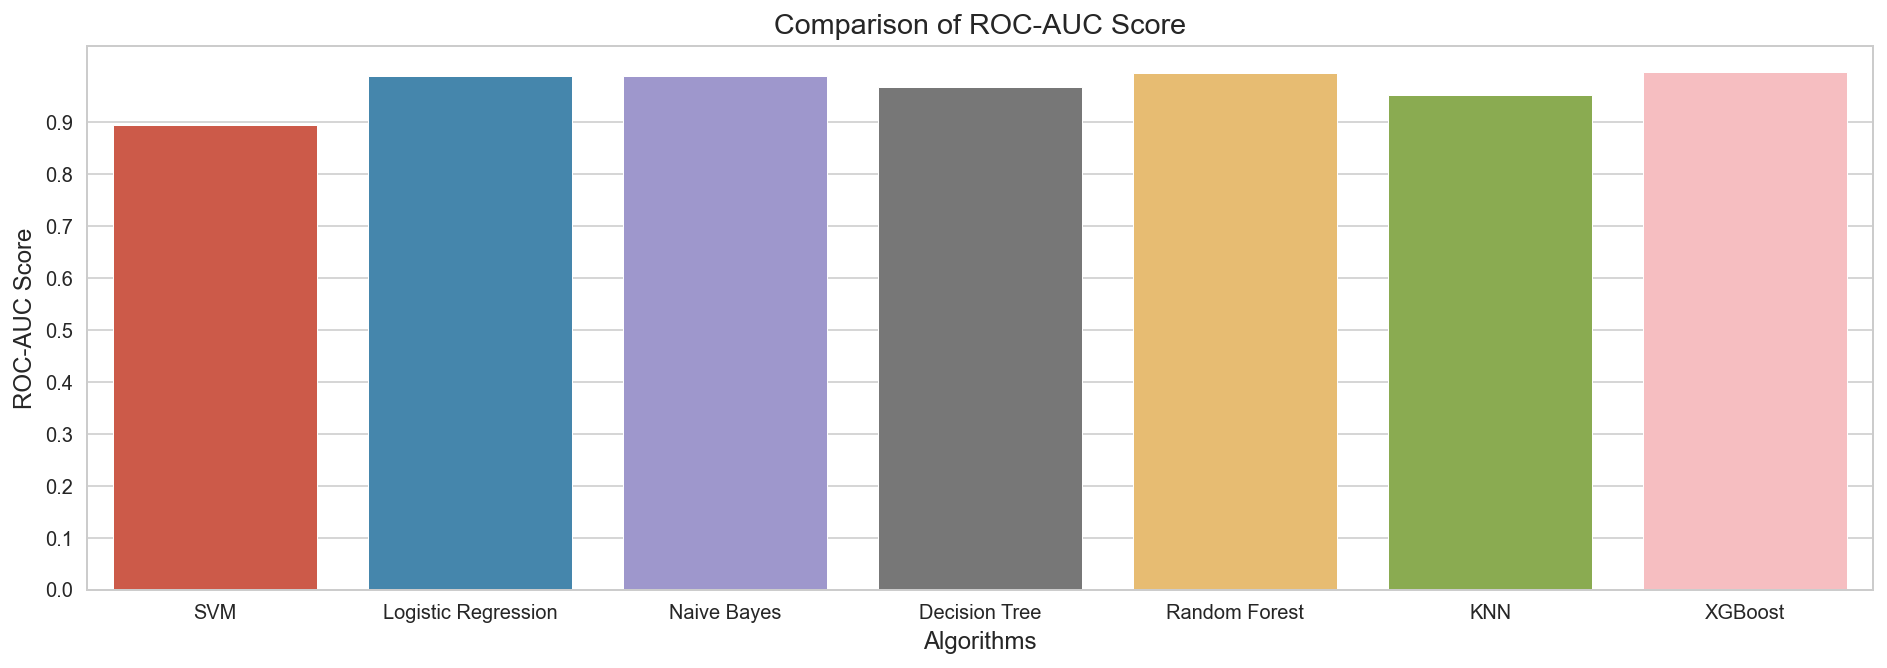

In [59]:
# colors = ["purple", "green", "orange", "magenta","#CFC60E","#0FBBAE"]

sns.set_style("whitegrid")
plt.figure(figsize=(16,5))
plt.yticks(np.arange(0,1,0.1))
plt.ylabel("ROC-AUC Score")
plt.xlabel("Algorithms")
sns.barplot(x=list(ROC_AUC_score.keys()), y=list(ROC_AUC_score.values()))
plt.title('Comparison of ROC-AUC Score')
plt.show()

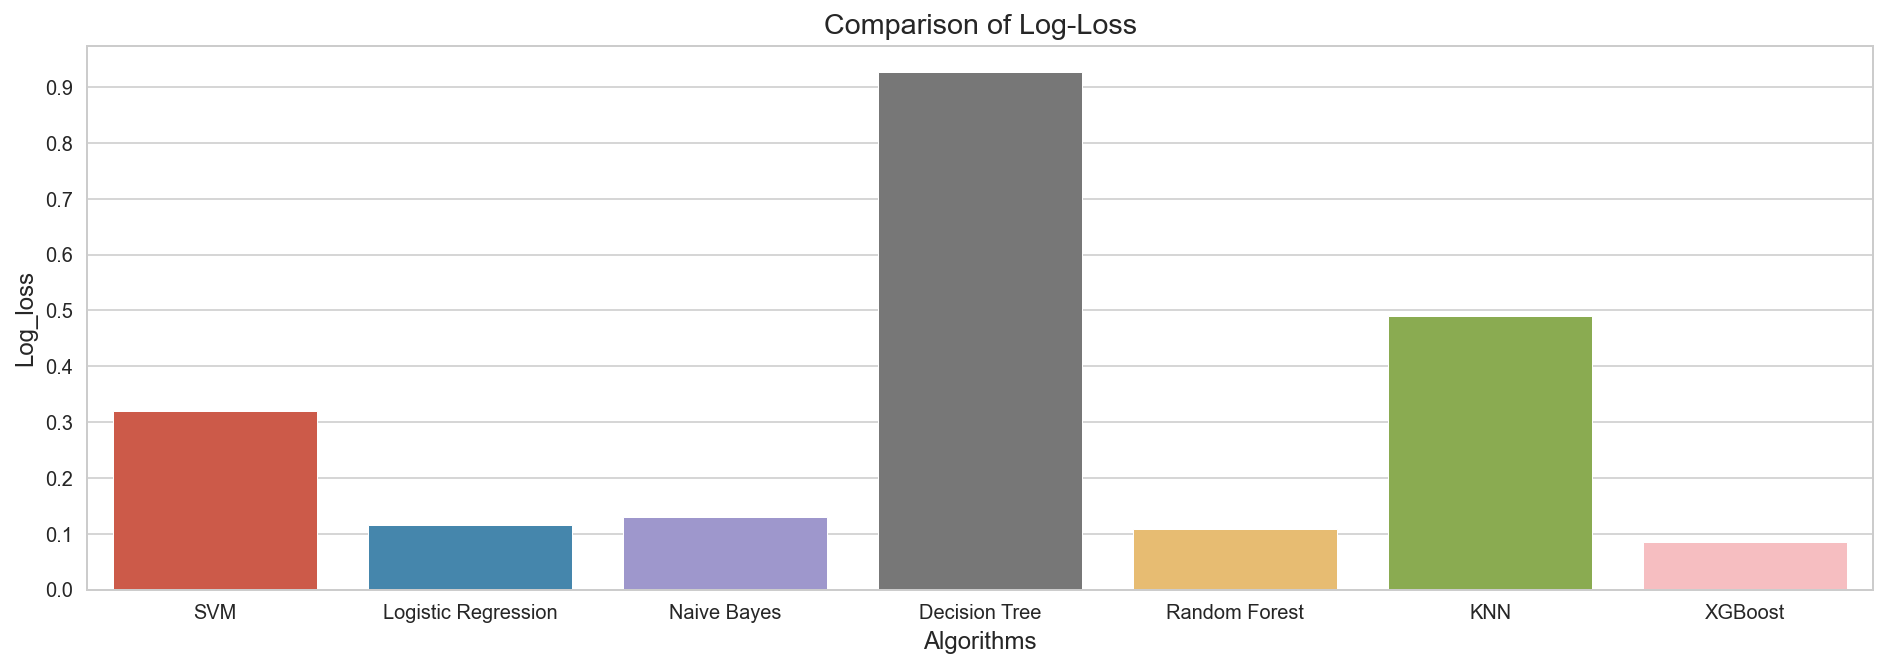

In [60]:
# colors = ["purple", "green", "orange", "magenta","#CFC60E","#0FBBAE"]

sns.set_style("whitegrid")
plt.figure(figsize=(16,5))
plt.yticks(np.arange(0,1,0.1))
plt.ylabel("Log_loss")
plt.xlabel("Algorithms")
sns.barplot(x=list(Log_loss.keys()), y=list(Log_loss.values()))
plt.title('Comparison of Log-Loss')
plt.show()

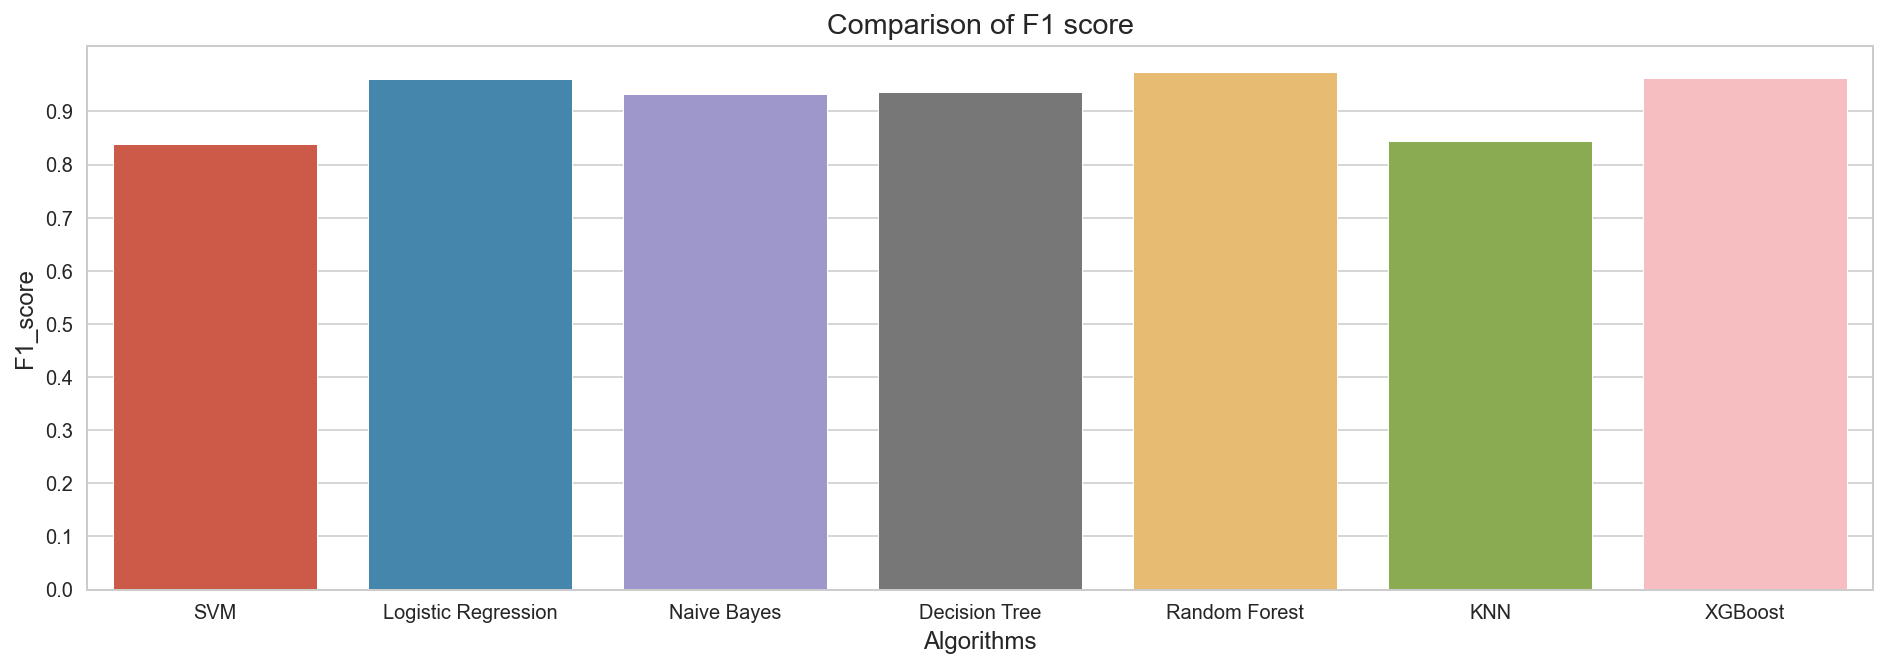

In [61]:
# colors = ["purple", "green", "orange", "magenta","#CFC60E","#0FBBAE"]

sns.set_style("whitegrid")
plt.figure(figsize=(16,5))
plt.yticks(np.arange(0,1,0.1))
plt.ylabel("F1_score")
plt.xlabel("Algorithms")
sns.barplot(x=list(F1_score.keys()), y=list(F1_score.values()))
plt.title('Comparison of F1 score')
plt.show()

## Confusion Matrix

In [62]:
# Predicted values
y_head_logit = best_clf_logit.predict(X_test)
y_head_knn = best_clf_knn.predict(X_test)
y_head_svm = best_clf_svm.predict(X_test)
y_head_gnb = gnb.predict(X_test)
y_head_dtc = best_clf_dtc.predict(X_test)
y_head_rf = best_clf_rf.predict(X_test)
y_head_xgb = best_clf_xgb.predict(X_test)

In [63]:
from sklearn.metrics import confusion_matrix

cm_logit = confusion_matrix(y_test,y_head_logit)
cm_knn = confusion_matrix(y_test,y_head_knn)
cm_svm = confusion_matrix(y_test,y_head_svm)
cm_gnb = confusion_matrix(y_test,y_head_gnb)
cm_dtc = confusion_matrix(y_test,y_head_dtc)
cm_rf = confusion_matrix(y_test,y_head_rf)
cm_xgb = confusion_matrix(y_test,y_head_xgb)

C:\Users\HP\anaconda3\envs\metis\lib\site-packages\ipykernel_launcher.py:30: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


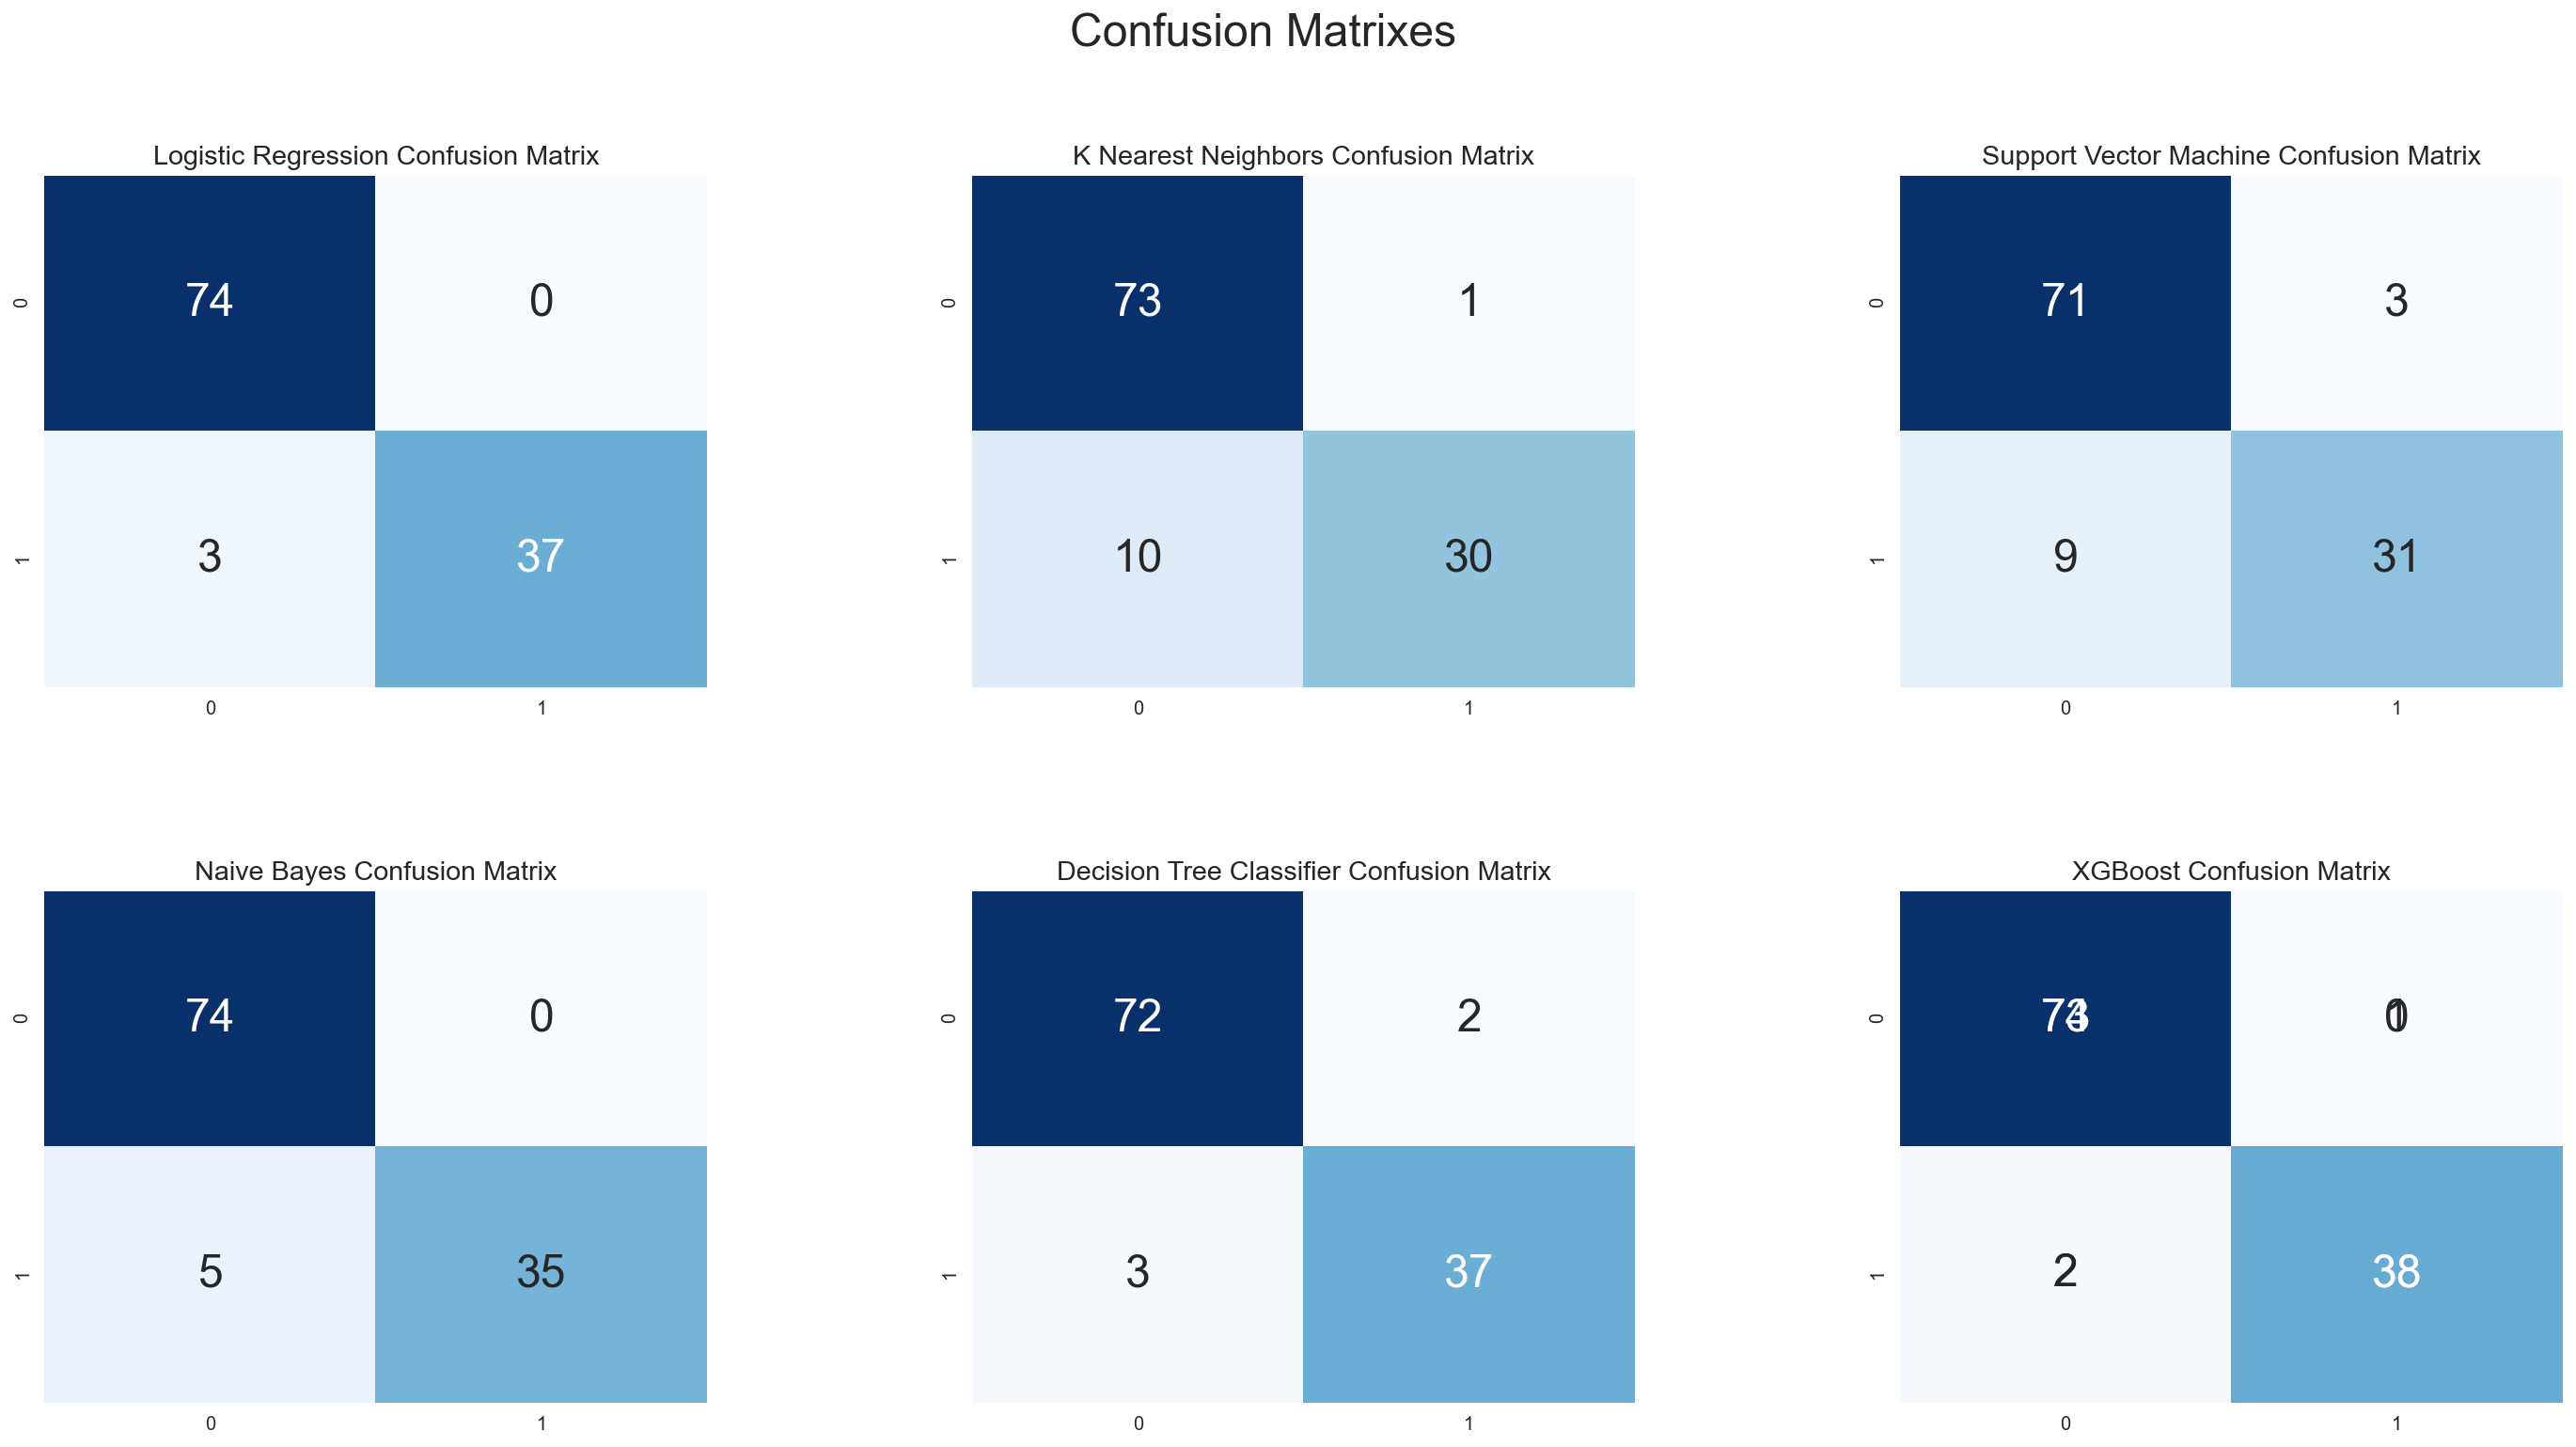

In [64]:
plt.figure(figsize=(24,12))

plt.suptitle("Confusion Matrixes",fontsize=24)
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

plt.subplot(2,3,1)
plt.title("Logistic Regression Confusion Matrix")
sns.heatmap(cm_logit,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,2)
plt.title("K Nearest Neighbors Confusion Matrix")
sns.heatmap(cm_knn,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,3)
plt.title("Support Vector Machine Confusion Matrix")
sns.heatmap(cm_svm,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,4)
plt.title("Naive Bayes Confusion Matrix")
sns.heatmap(cm_gnb,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,5)
plt.title("Decision Tree Classifier Confusion Matrix")
sns.heatmap(cm_dtc,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,6)
plt.title("Random Forest Confusion Matrix")
sns.heatmap(cm_rf,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,6)
plt.title("XGBoost Confusion Matrix")
sns.heatmap(cm_xgb,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.show()

#### Basic terminology

0: negative class
1: positive class

True positive (TP): Prediction is +ve and cell is Malignant, we want that

True negative (TN): Prediction is -ve and cell is Benign (healthy), we want that too

False positive (FP): Prediction is +ve but cell is Benign, false alarm, bad

False negative (FN): Prediction is -ve (means healthy) but cell is actually Malignant, the worst

## To continue in Part 3: Compare with Keras